### Import Libraries

In [120]:

from numpy import mean
from numpy import std
import pandas as pd
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
 


### Load Data

In [165]:
# define the dataset location
path = "C:\\Users\\TrishaMaitra\\Downloads\\Crop_recommendation.csv"
# load the csv file as a data frame
df = read_csv(path)


### Exploratory Data Analysis

In [3]:
df.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [4]:
df.shape

(2200, 8)

In [5]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
df.label.value_counts()

mungbean       100
kidneybeans    100
pigeonpeas     100
watermelon     100
coconut        100
muskmelon      100
jute           100
coffee         100
papaya         100
pomegranate    100
cotton         100
mothbeans      100
rice           100
banana         100
maize          100
blackgram      100
orange         100
mango          100
apple          100
grapes         100
chickpea       100
lentil         100
Name: label, dtype: int64

This is a balanced dataset

In [7]:
df.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

Variables are in difference scale. Scaling would be required.

In [8]:
d_corr=df.iloc[:,[0,1,2,3,4,5,6]].corr()
d_corr

N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   

             rainfall  
N            0.059020  
P           -0.063839  
K           -0.053461  
temperature -0.030084  
humidity     0.094423  
ph          -0.109069  
rainfall     1.000000

Correlation coefficient shows strong multicollinearity is not present among features

column:  N


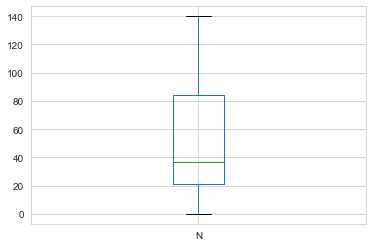

column:  P


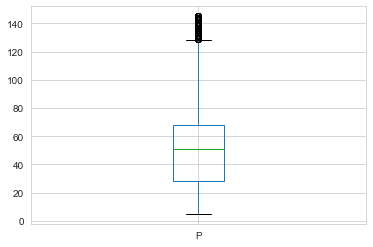

column:  K


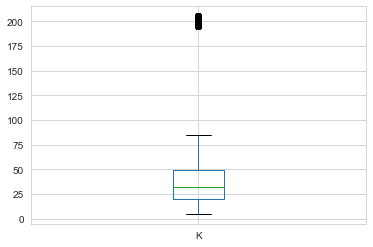

column:  temperature


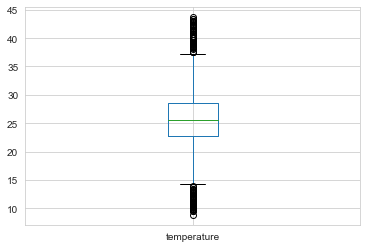

column:  humidity


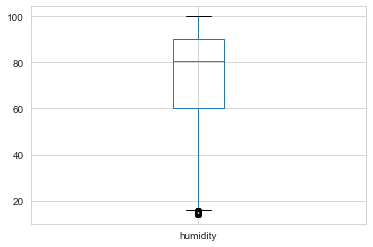

column:  ph


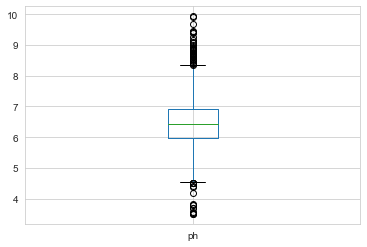

column:  rainfall


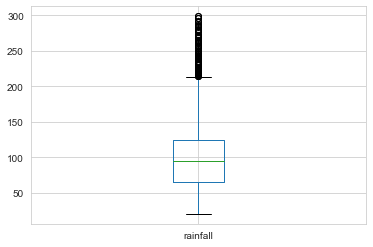

column:  label


<Figure size 432x288 with 0 Axes>

In [104]:
# Checking outliers

for column in df:
    plt.figure()
    print('column: ', column)
    if column != 'label':
        df.boxplot([column])
        plt.show()

In [284]:
original_rows=df.shape[0]
tota_remove = 10
while tota_remove>0:
    tota_remove = 0
    for col in range(len(df.columns)):
        colname = df.columns[col]
        #print(colname)
        if colname != 'label':
            z = df[[colname]]
            q25, q75 = np.percentile(z, 25), np.percentile(z, 75)
            iqr = q75 - q25
            # calculate the outlier cutoff
            cut_off = iqr * 1.5
            lower, upper = q25 - cut_off, q75 + cut_off

            # identify outliers
            df = df[(df[colname]>=lower) & (df[colname]<=upper)]
            #print(original_rows-df.shape[0])
    tota_remove = original_rows-df.shape[0]  
    
    #print('total removed', tota_remove)
    original_rows = df.shape[0]
print('outlier removed')


outlier removed


column:  N


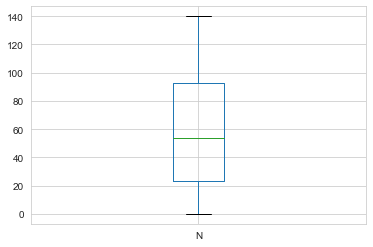

column:  P


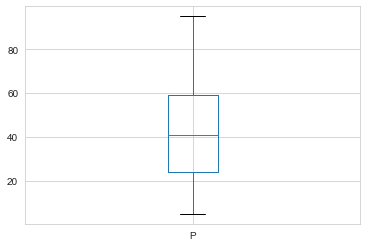

column:  K


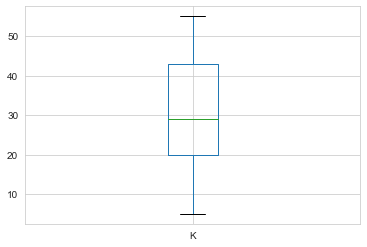

column:  temperature


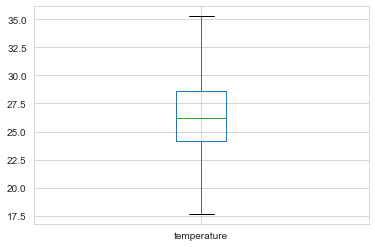

column:  humidity


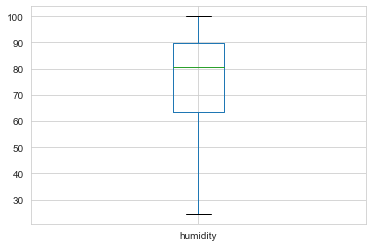

column:  ph


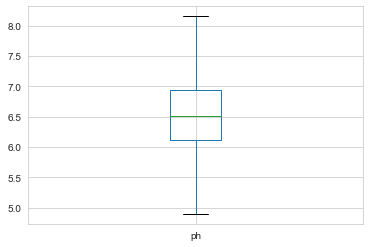

column:  rainfall


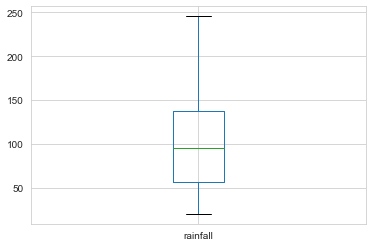

column:  label


<Figure size 432x288 with 0 Axes>

In [167]:
# Checking outliers

for column in df:
    plt.figure()
    print('column: ', column)
    if column != 'label':
        df.boxplot([column])
        plt.show()

In [168]:
df.shape

(1599, 8)

In [197]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [198]:
df.label.unique()

array(['rice', 'maize', 'kidneybeans', 'pigeonpeas', 'mothbeans',
       'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana',
       'mango', 'watermelon', 'muskmelon', 'orange', 'papaya', 'coconut',
       'cotton', 'jute', 'coffee'], dtype=object)

### Data Visualization

##### Histogram

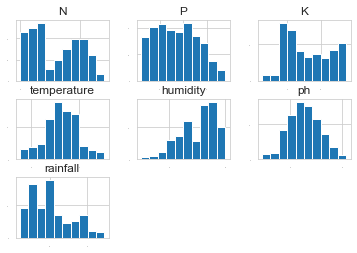

In [169]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

##### Pair plot 

In [170]:
df1 = df.copy()

In [171]:
df1['label'] = LabelEncoder().fit_transform(df1['label'])

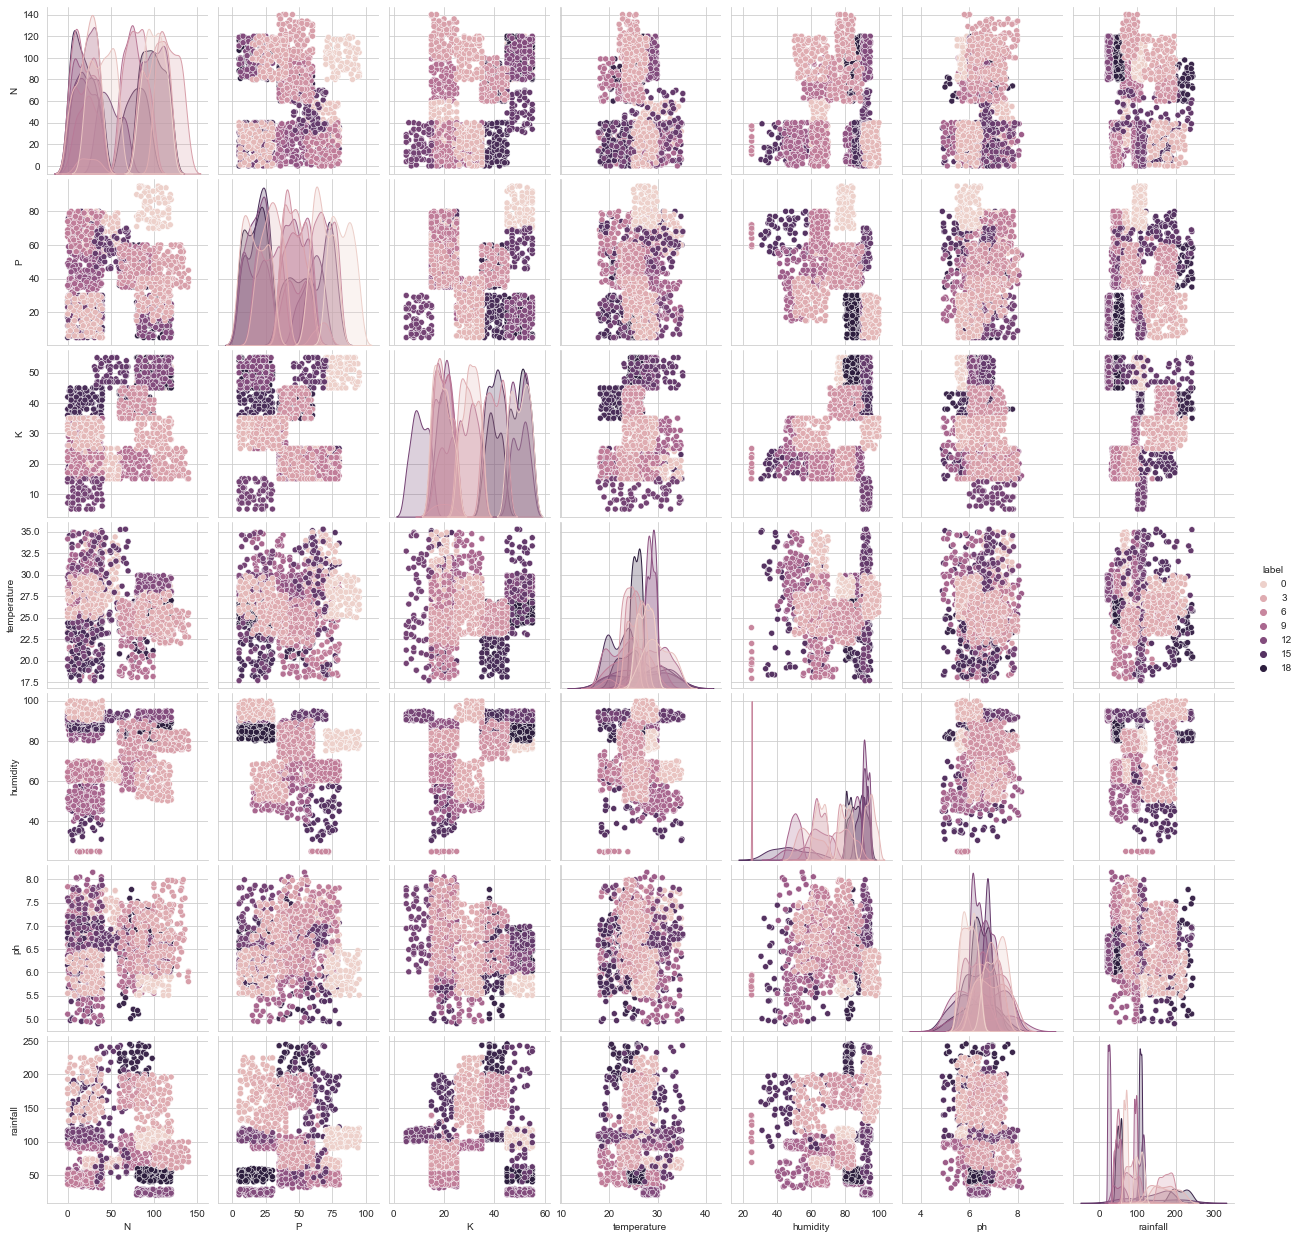

In [172]:
sns.set_style('whitegrid')
sns.pairplot(df1, hue='label')
plt.show()

### Clustering Crops with KMeans

Seperating target feature 

In [263]:
df3=df.copy()
df3=df3.reset_index(drop=True)
y = df3.pop('label')

In [264]:
y.shape

(1599,)

Scaling the dataset with Normalizer

In [265]:
X = df3
X = X.astype('float')
scaler = Normalizer()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)
X.columns = df3.columns

##### Plotting the Elbow plot and it is observed the optimum to be 10

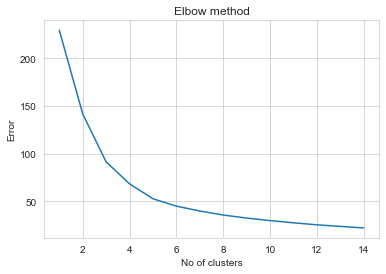

In [201]:
Error =[]
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 15), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

##### KMeans with K=5

In [266]:
clustering = KMeans(n_clusters=5, random_state=8675309,n_jobs=-1)
clustering.fit(X)
X_labels = clustering.predict(X)
centers = clustering.cluster_centers_
X_clstrs = X.copy()
X_clstrs['clusters'] = X_labels
X_clstrs['clusters']=X_clstrs['clusters'].astype('str')



##### Visualizing Clusters for combination of features in 2-D


Columns N vs P


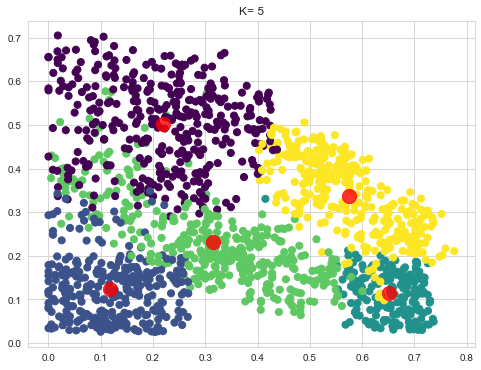


Columns N vs K


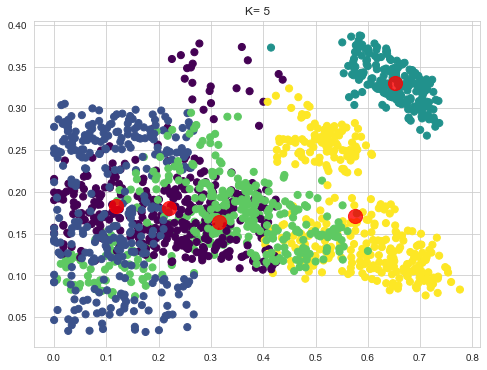


Columns N vs temperature


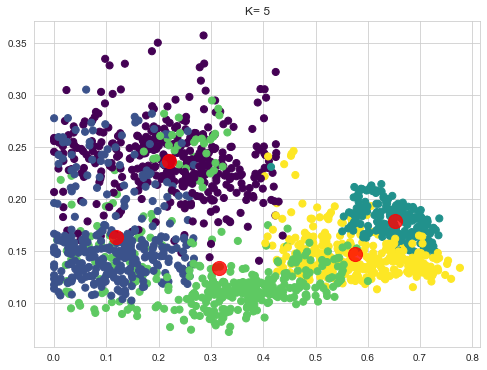


Columns N vs humidity


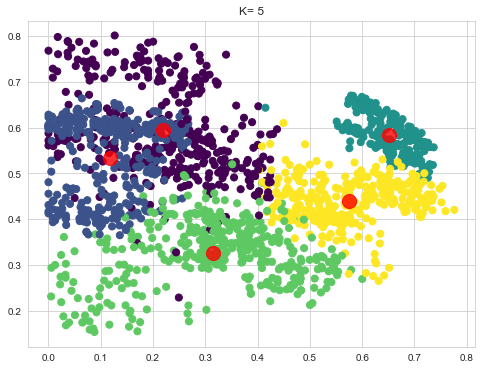


Columns N vs ph


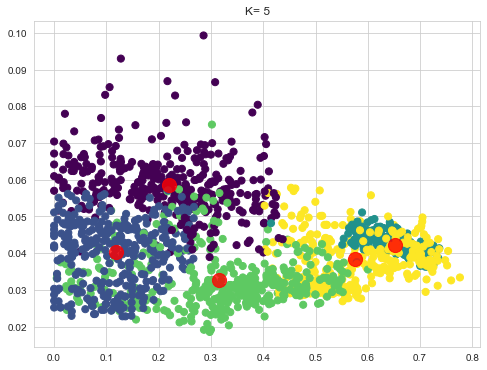


Columns N vs rainfall


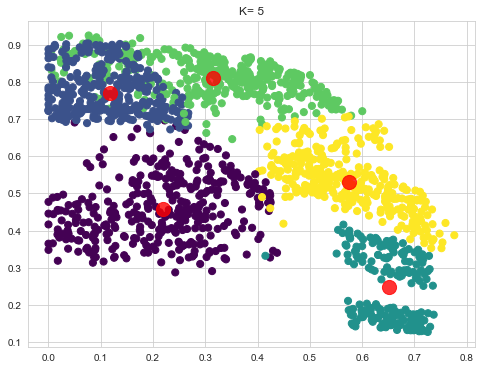


Columns P vs K


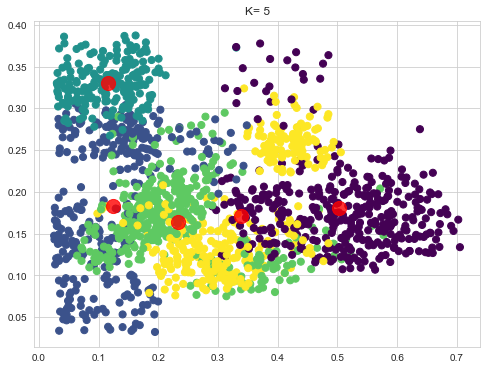


Columns P vs temperature


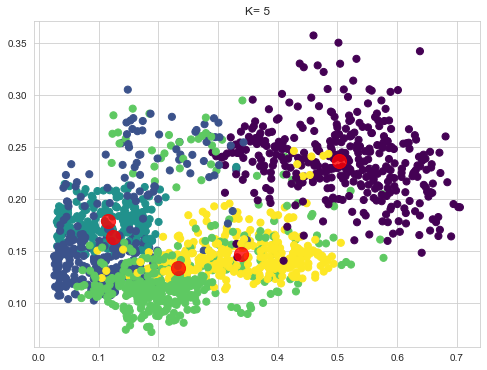


Columns P vs humidity


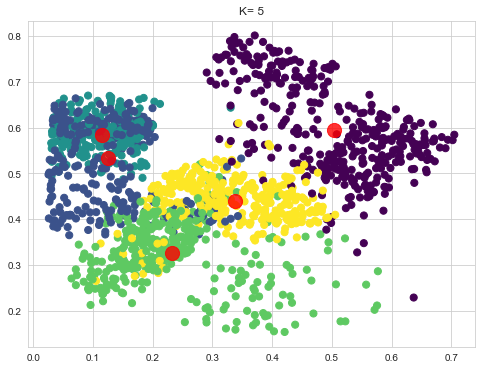


Columns P vs ph


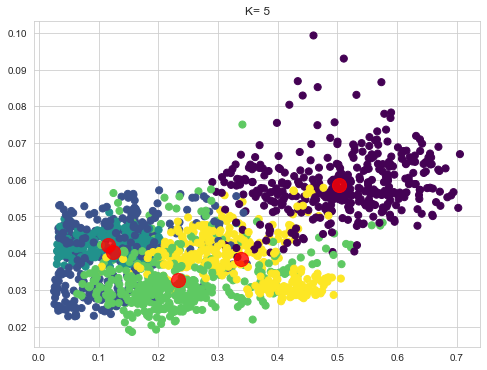


Columns P vs rainfall


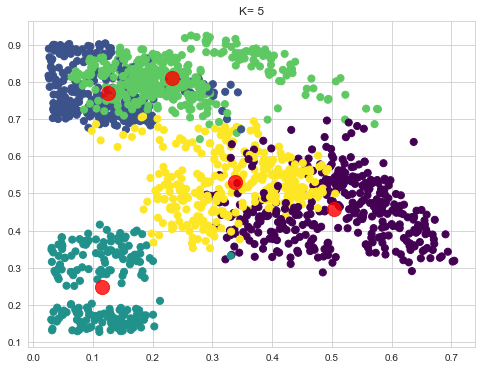


Columns K vs temperature


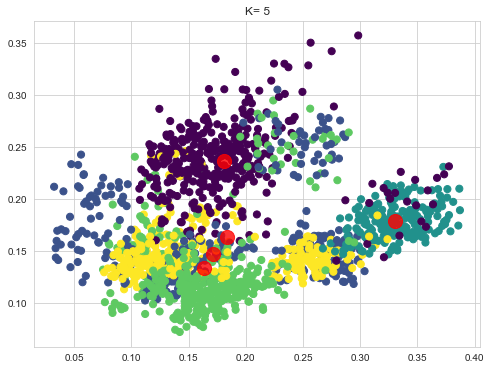


Columns K vs humidity


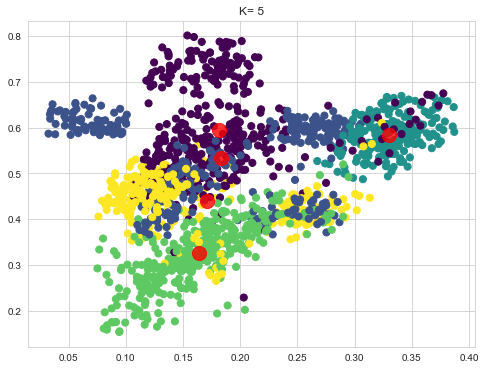


Columns K vs ph


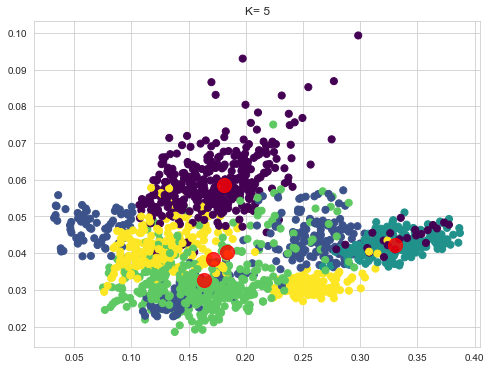


Columns K vs rainfall


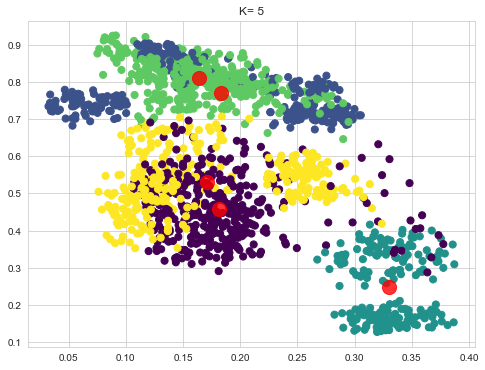


Columns temperature vs humidity


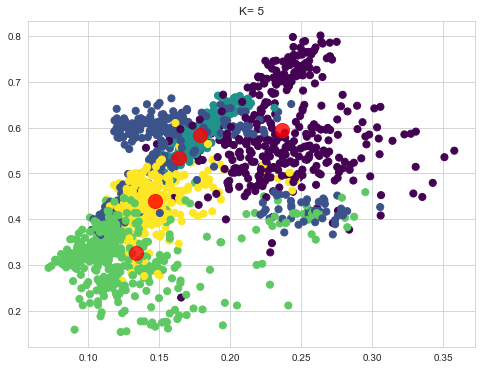


Columns temperature vs ph


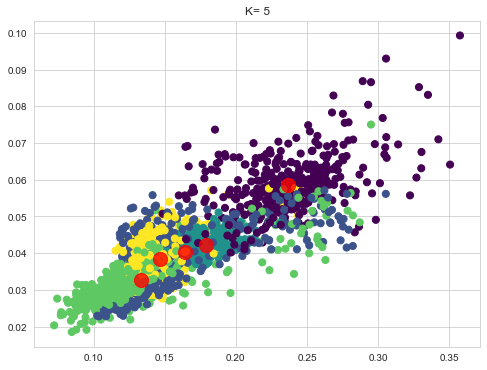


Columns temperature vs rainfall


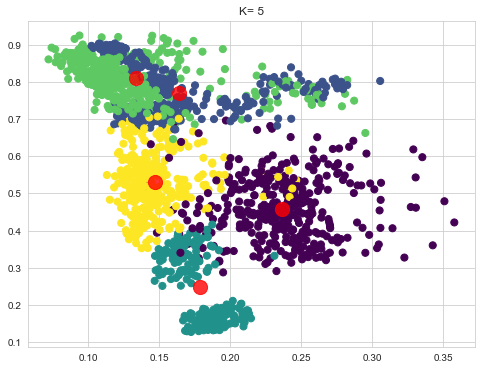


Columns humidity vs ph


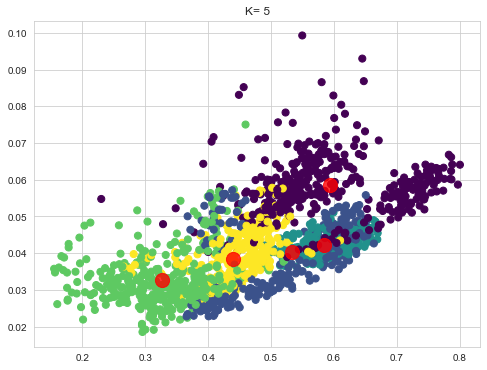


Columns humidity vs rainfall


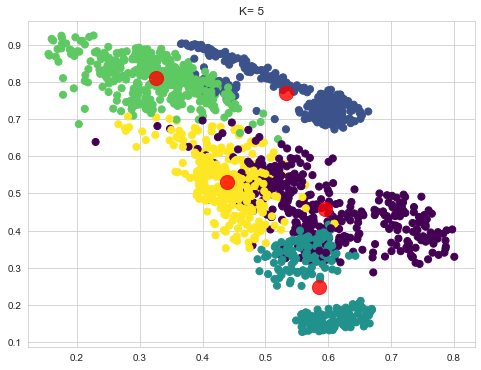


Columns ph vs rainfall


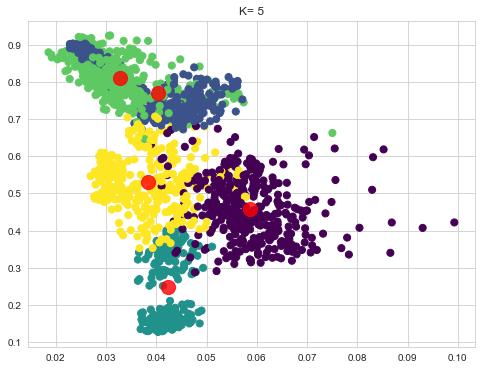

In [203]:
x_col = []
for i in range(7): 
    x_col.append(i)
    for j in range(7):
        clustering = KMeans(n_clusters=5, random_state=8675309,n_jobs=-1)
        if (i != j) & (j not in x_col):
            print(f'\nColumns {X.columns[i]} vs {X.columns[j]}')
            plt.figure(figsize=(8,6))
            plt.scatter(X.iloc[:, i], X.iloc[:, j], c=X_labels, s=50, cmap='viridis')            
            plt.scatter(centers[:, i], centers[:, j], c='red', s=200, alpha=0.8)
            plt.title('K= 5')
            plt.show()

##### Pair plot for the clusters

In [267]:
after_cluster = pd.concat([X_clstrs, y], axis=1)


In [248]:
after_cluster.shape

(1599, 9)

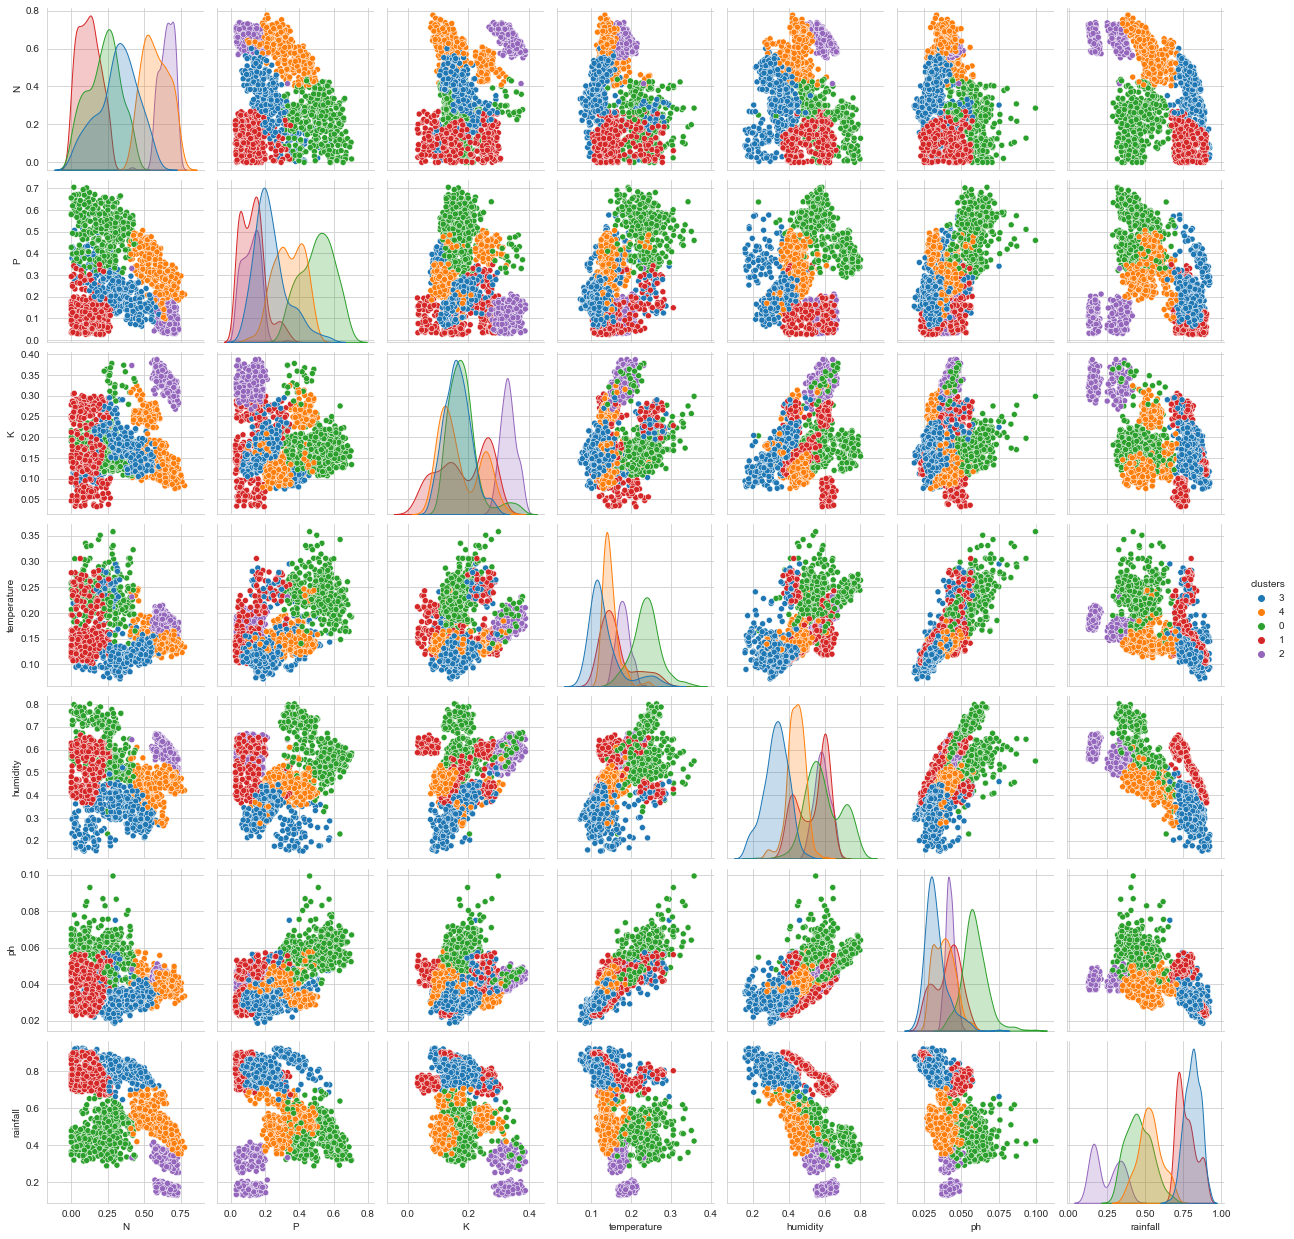

In [270]:

sns.set_style('whitegrid')
sns.pairplot(after_cluster, hue='clusters')
plt.show()

##### Crops coming under each Clusters

In [271]:
crop_dict = {}
for i in range(5):
    cluster = str(i)
    crops=after_cluster[after_cluster.clusters==cluster].label.unique()
    crop_dict[cluster]=crops
    print(f'Cluster {i+1}: {crops}')

    

Cluster 1: ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'papaya']
Cluster 2: ['pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 3: ['watermelon' 'muskmelon' 'papaya']
Cluster 4: ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mango' 'papaya'
 'jute' 'coffee']
Cluster 5: ['maize' 'blackgram' 'banana' 'papaya' 'cotton' 'coffee']


### Multi Class Classification for the Clusters

In [1]:
# target variable
y_clustered = X_clstrs.pop('clusters')

NameError: name 'X_clstrs' is not defined

In [273]:
# predictor
X_clstrs.head()

N         P         K  temperature  humidity        ph  rainfall
0  0.367122  0.171324  0.175403     0.085171  0.334500  0.026527  0.827801
1  0.319862  0.218259  0.154286     0.081924  0.302250  0.026485  0.852924
2  0.271188  0.128265  0.146588     0.097082  0.293757  0.025581  0.890025
3  0.334201  0.188432  0.142213     0.072094  0.294715  0.020332  0.860297
4  0.329380  0.199849  0.140634     0.090731  0.309156  0.024742  0.852859

In [274]:
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [275]:
# evaluate each model in turn
X_train, X_validation, Y_train, Y_validation = train_test_split(X_clstrs, y_clustered, test_size=0.20, random_state=1, shuffle=True)
results = []
names = []
scoring = 'accuracy'
for name, model in models:
   
    kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    cv_results = model_selection.cross_val_score(model,X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.981232 (0.010017)
LDA: 0.971594 (0.012511)
KNN: 0.981750 (0.011137)
CART: 0.973940 (0.013282)
NB: 0.942163 (0.021092)
SVM: 0.981232 (0.010799)


##### boxplot algorithm comparison

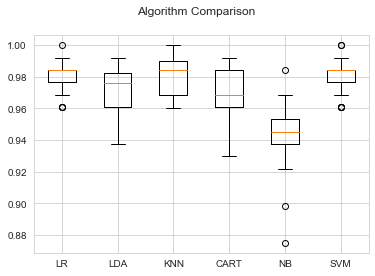

In [185]:

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [186]:
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

# Evaluate predictions
predictions = model.predict(X_validation)
print('Accuracy: ', metrics.accuracy_score(Y_validation, predictions))
print('Confusion Matrix:\n',metrics.confusion_matrix(Y_validation, predictions))
print('Classification Report:\n', metrics.classification_report(Y_validation, predictions))

Accuracy:  0.9875
Confusion Matrix:
 [[74  0  0  0  0]
 [ 0 66  0  0  0]
 [ 1  0 43  0  0]
 [ 0  0  0 73  1]
 [ 1  0  0  1 60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        74
           1       1.00      1.00      1.00        66
           2       1.00      0.98      0.99        44
           3       0.99      0.99      0.99        74
           4       0.98      0.97      0.98        62

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



In [187]:
# Fit model for the full data
model = KNeighborsClassifier()
model.fit(X_clstrs, y_clustered)

KNeighborsClassifier()

### For Each Cluster the Requiremments of Climate

In [244]:
y_clustered.shape

(1599,)

In [276]:
revert_df = pd.concat([df3, y_clustered], axis=1)


In [278]:
for i in range(5):
    cluster = str(i)
    print('\nCluster: ', i+1)
    print('Crops: ', crop_dict[cluster])
    print('Requirements:\n')
    temp_df = revert_df[revert_df.clusters==cluster]
    desc = temp_df.describe()
    
    for col in range(len(desc.columns)):
        name = revert_df.columns[col]
        print(f'Average of {name} is {round(desc.iloc[1][col],2)} with the value in range ({round(desc.iloc[3][col],2)}, {round(desc.iloc[7][col],2)})')
    


Cluster:  1
Crops:  ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'papaya']
Requirements:

Average of N is 26.72 with the value in range (0.0, 68.0)
Average of P is 59.5 with the value in range (35.0, 80.0)
Average of K is 21.59 with the value in range (15.0, 55.0)
Average of temperature is 27.78 with the value in range (17.92, 34.95)
Average of humidity is 70.23 with the value in range (24.91, 94.94)
Average of ph is 6.85 with the value in range (4.93, 8.15)
Average of rainfall is 54.8 with the value in range (30.92, 108.41)

Cluster:  2
Crops:  ['pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Requirements:

Average of N is 19.4 with the value in range (0.0, 42.0)
Average of P is 19.49 with the value in range (5.0, 62.0)
Average of K is 29.23 with the value in range (5.0, 52.0)
Average of temperature is 25.94 with the value in range (17.67, 34.91)
Average of humidity is 86.51 with the value in range (45.02, 99.98)
Average of ph is 6.36 with the value in 


Cluster:  1
Crops:  ['kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean' 'blackgram' 'lentil'
 'papaya']
Required Climates:



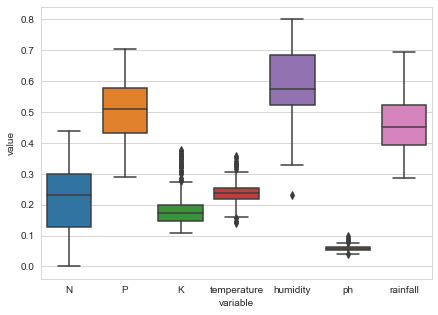


Cluster:  2
Crops:  ['pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Required Climates:



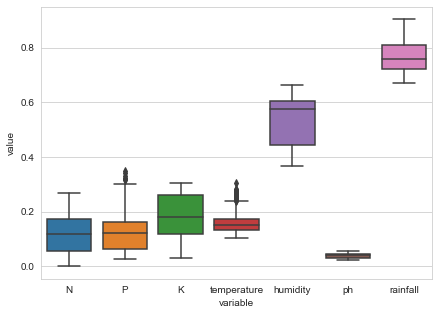


Cluster:  3
Crops:  ['watermelon' 'muskmelon' 'papaya']
Required Climates:



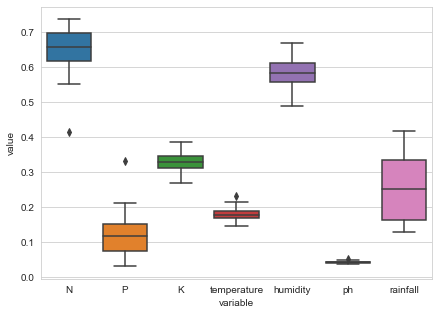


Cluster:  4
Crops:  ['rice' 'maize' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mango' 'papaya'
 'jute' 'coffee']
Required Climates:



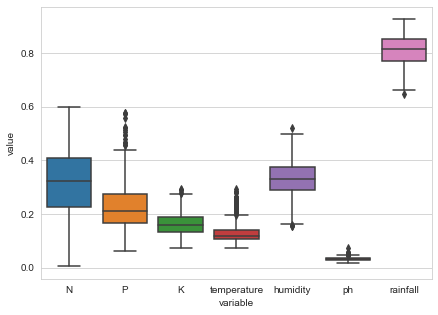


Cluster:  5
Crops:  ['maize' 'blackgram' 'banana' 'papaya' 'cotton' 'coffee']
Required Climates:



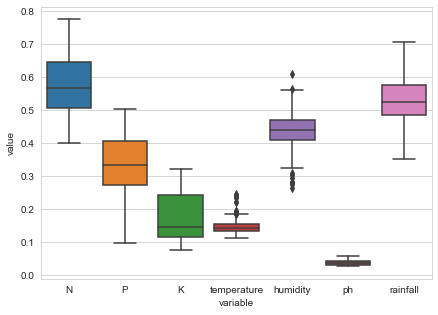

In [283]:
for i in range(5):
    cluster = str(i)
    print('\nCluster: ', i+1)
    print('Crops: ', crop_dict[cluster])
    print('Required Climates:\n')
    temp_df = after_cluster[after_cluster.clusters==cluster]
    temp_df= temp_df.drop(['clusters','label'], axis=1)
    temp_melt = pd.melt(temp_df)
    
    temp_melt['value'] = temp_melt['value'].astype('float')
    plt.figure(figsize=(7,5))
    sns.boxplot(x="variable", y="value", data=temp_melt)
    plt.show()

Feature:  N


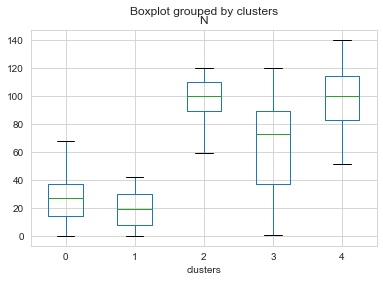

Feature:  P


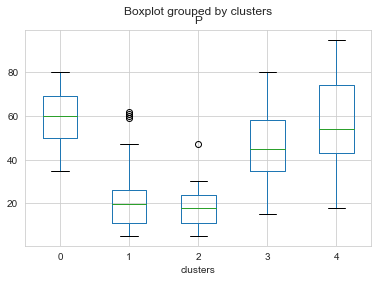

Feature:  K


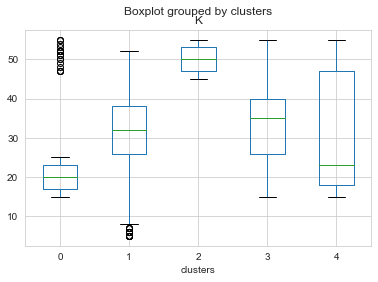

Feature:  temperature


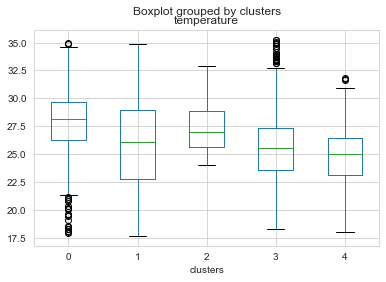

Feature:  humidity


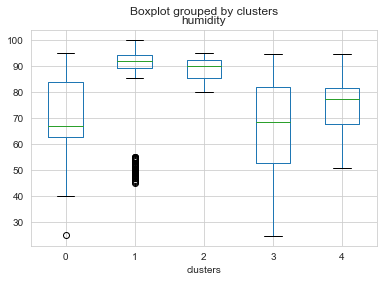

Feature:  ph


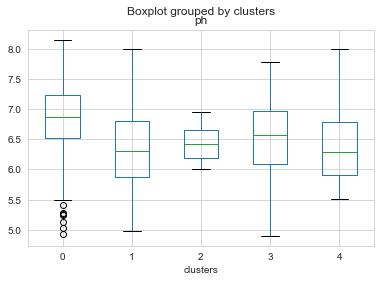

Feature:  rainfall


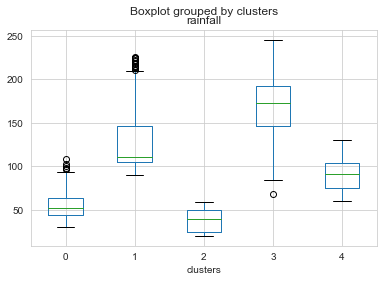

In [280]:
for col in range(len(revert_df.columns)):
    name = revert_df.columns[col]
    if name!='clusters':
        print('Feature: ', name)    
        revert_df.boxplot(by ='clusters', column =[name], grid = True)
        plt.show()
    